## 参考
沼田さんの記事より引用し、一部を変更
引用元：https://qiita.com/kifumi/items/c8988bb0c5f2d73839cc

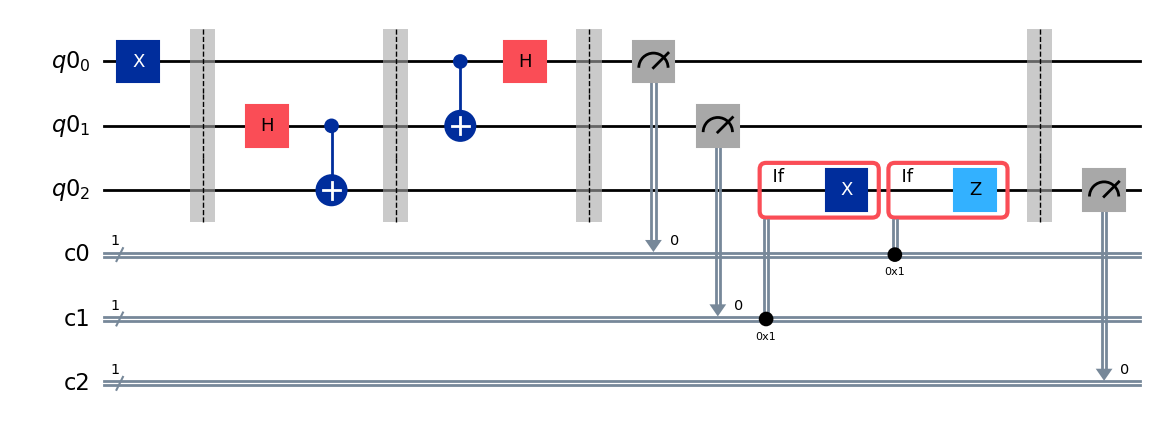

In [1]:
# Qiskitライブラリーを導入
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np

# 3量子ビット回路を用意
qr = QuantumRegister(3)
a_0 = ClassicalRegister(1) # Alice
a_1 = ClassicalRegister(1) # Alice
b_0 = ClassicalRegister(1) # Bob

qc = QuantumCircuit(qr,a_0,a_1,b_0)

# Aliceのもつ未知の量子状態ψを作ります。
#qc.ry(np.pi/5,0)
qc.x(0)
qc.barrier()

# EveがEPRペアを作ってq1をAliceにq2をBobに渡します
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# AliceがCNOTとHでψと自分のEPRペアをエンタングルさせ測定します。
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure(0, a_0)
qc.measure(1, a_1)

# Aliceが測定結果をBobに送り、Bobが結果に合わせて操作します
with qc.if_test((a_1, 1)):
    qc.x(2)
with qc.if_test((a_0, 1)):
    qc.z(2)
qc.barrier()

# 未知の量子状態ψの逆向きの演算をかけて０が測定できるか確かめます
#qc.ry(-np.pi/5, 2)
qc.measure(2, b_0)

# 回路を描画
qc.draw(output="mpl")

In [2]:
# Aliceが測定結果をBobに送り、Bobが結果に合わせて操作します
with qc.if_test((a_0, 1)):
    qc.z(2)
with qc.if_test((a_1, 1)):
    qc.x(2)

{'1 0 0': 264, '1 1 1': 233, '1 1 0': 268, '1 0 1': 259}


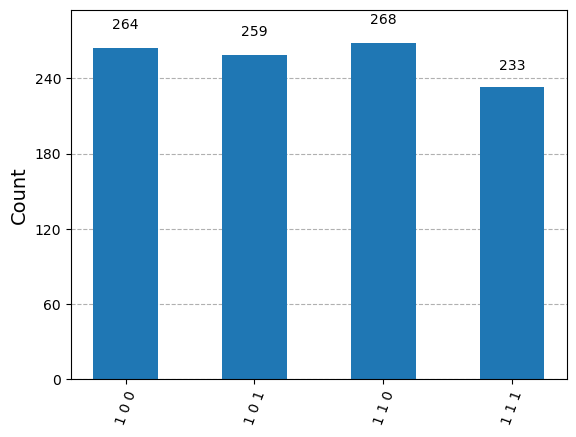

In [3]:
# シミュレーターで実験
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
job_sim = simulator.run(qc)
result_sim = job_sim.result()

#  測定された回数を表示
counts = result_sim.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram(counts)